In [1]:
import numpy as np
import matplotlib.pyplot as plt

from util.plot import formatenc, formatim
from utils import epochbin

plt.style.use('presentation.mplstyle')

In [2]:
data = np.zeros(10*512).reshape(-1, 1)
tmax, window, jump = 4*512, .250*512, .0625*512
lags = np.arange(-tmax, tmax+jump, jump).astype(int)
onsets = [5*512]
data[onsets, :] = 1
S = epochbin(data, onsets, lags, int(window)).squeeze()
S /= S.sum()
S.shape

(129,)

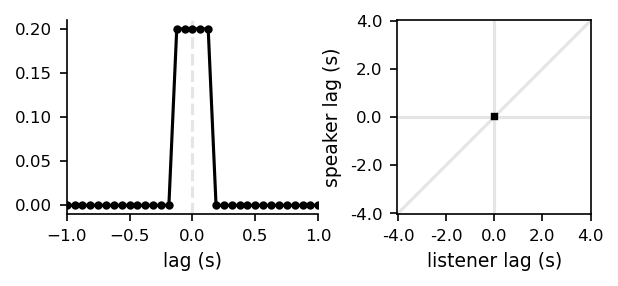

In [3]:
fsh = 2.24*(3/4)
fs2c = (4.76, fsh)
xaxis = lags/512

fig, axes = plt.subplots(1, 2, figsize=fs2c)

ax = axes[0]
ax.plot(xaxis, S, marker='.', color='black')
ax.set_xlim(-1, 1)
ax.set(xlabel='lag (s)')
formatenc(ax)

ax = axes[1]
im = ax.imshow(np.outer(S, S), cmap='Greys', origin='lower')
formatim(fig, ax, im, xaxis, cbar_loc=None)
plt.show()